In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
abc = 'abcdefghijklmnopqrstuvwxyz'
stoi = {s: i+1 for i, s in enumerate(abc)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [4]:
xs, ys = [], []
for w in words:
    w = '..' + w + '.'
    for ch1, ch2, ch3 in zip(w, w[1:], w[2:]):
        # print(ch1, ch2, ch3)
        xs.append([stoi[ch1], stoi[ch2]])
        ys.append(stoi[ch3])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = ys.nelement()
print('Number of elemnets:', num)

Number of elemnets: 228146


In [5]:
xs[:10]

tensor([[ 0,  0],
        [ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1],
        [ 0,  0],
        [ 0, 15],
        [15, 12],
        [12,  9],
        [ 9, 22]])

In [6]:
ys[:10]

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9])

In [7]:
F.one_hot(xs, num_classes=27).view(-1, 27*2)[:3]

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0]])

In [8]:
g = torch.Generator().manual_seed(123456789)
W = torch.randn((27*2, 27), generator=g, requires_grad=True)
W[0]

tensor([ 0.2643, -0.4149, -0.6075,  0.7319, -0.1569, -0.8602, -0.8462, -0.3094,
        -0.9846,  1.3006, -1.5222,  0.6169,  1.0747,  0.0317, -1.2312,  1.2970,
        -1.4020, -0.7056,  1.4701,  0.0147,  0.6378,  1.3168,  1.2772,  0.0794,
        -0.4374,  0.3369,  0.6316], grad_fn=<SelectBackward0>)

In [9]:
xenc = F.one_hot(xs, num_classes=27).float().view(-1,2*27)
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(num),ys].log().mean()
loss

tensor(4.1910, grad_fn=<NegBackward0>)

In [10]:
W.grad = None
loss.backward()
arr = []

In [11]:
# W.data -= 5 * W.grad

tensor(2.4762, grad_fn=<NegBackward0>)


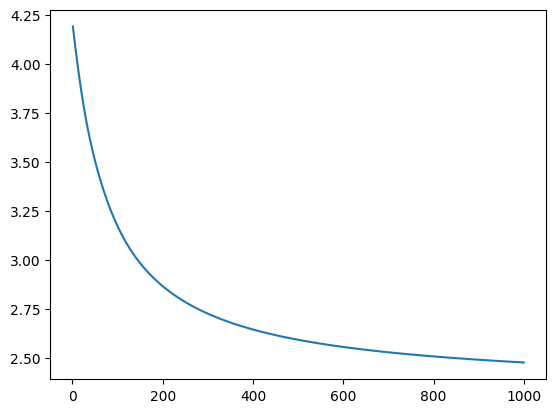

In [18]:
for k in range(400):
    xenc = F.one_hot(xs, num_classes=27).float().view(-1,2*27)
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num),ys].log().mean()
    arr.append(loss.detach())
    # print(loss)

    W.grad = None
    loss.backward()

    W.data -= 1 * W.grad

print(loss)
plt.plot(range(1, len(arr)+1), arr)

In [13]:
xenc = F.one_hot(xs, num_classes=27).float().view(-1,2*27)
logits = xenc @ W
counts = logits.exp()
p = counts / counts.sum(1, keepdim=True)

print(torch.multinomial(p, num_samples=1, replacement=True, generator=g))


tensor([[ 4],
        [12],
        [ 5],
        ...,
        [ 0],
        [ 7],
        [25]])


In [27]:
x1, x2 = 0, 0
names = []
for _ in range(5):
    s = ''
    while True:
        xenc = F.one_hot(torch.tensor([x1, x2]), num_classes=27).float().view(-1,2*27)
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)
        
        val = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        x1, x2 = x2, val

        names.append(val)
        # print(val)
    
        s += itos[val]
        if val == 0: break

    print(s)
print(names)

astulielilewm.
ler.
mera.
da.
cllan.
[1, 19, 20, 21, 12, 9, 5, 12, 9, 12, 5, 23, 13, 0, 12, 5, 18, 0, 13, 5, 18, 1, 0, 4, 1, 0, 3, 12, 12, 1, 14, 0]
